# Title

* This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
* In thıs notebook CRISP-DM methodology followed

# Business Understanding

## About Dataset

**Context**

Ever wonder when is the ideal time of year to reserve a hotel room? or the ideal duration of stay to obtain the greatest daily rate? What if you could forecast if a hotel would be the target of an unusually high volume of special requests?

Use this hotel booking dataset to investigate those inquiries!

**Content**

This data collection provides reservation details for both city and resort hotels, including the date of the reservation, the duration of the stay, the number of people, children, and/or infants, and the quantity of parking spaces that are available, among other details.

All data that may be used to identify an individual has been deleted.

**Acknowledgements**

The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020.

## Description Columns

* hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)
* is_canceled: Value indicating if the booking was canceled (1) or not (0)
* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year: Year of arrival date
* arrival_date_month: Month of arrival date
* arrival_date_week_number: Week number of year for arrival date
* arrival_date_day_of_month: Day of arrival date
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults: Number of adults
* children: Number of children
* babies: Number of babies
* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* is_repetad_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_booking_not_canceled: Number of previous bookings that were cancelled by the customer prior to the current booking
* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No
* agent: ID of the travel agency that made the booking
* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for
* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of
* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_space: Number of car parking spaces required by the customer
* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

# Data Understanding and Explotary Data Analysis

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras import layers
import hyperopt

# For kerastuner, since it doesn't have a __version__ attribute, we use pkg_resources to get the version
import pkg_resources

def get_library_version(library_name):
    try:
        return pkg_resources.get_distribution(library_name).version
    except pkg_resources.DistributionNotFound:
        return "Not installed"

print("Library Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-Learn: {sklearn.__version__}")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras (standalone package): {keras.__version__}")
print(f"Keras Tuner: {get_library_version('keras-tuner')}")
print(f"Hyperopt: {hyperopt.__version__}")


## Getting Data

In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv")

hotel_df.head()

## General Data Info

In [11]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
total_cells = hotel_df.size


In [ ]:

null_column = hotel_df.isnull().sum()
null_column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
total_null = null_column.sum()
total_null

129425

In [ ]:
percent_null_per_column = (hotel_df.isnull().sum() / hotel_df.shape[0]) * 100
percent_null_per_column

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

## Data Visualisation

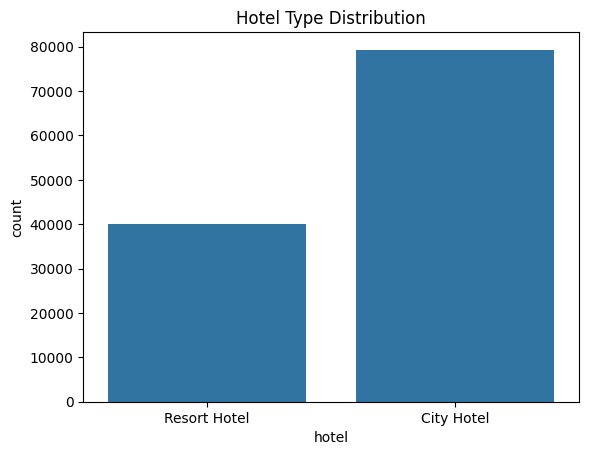

In [ ]:
# 1. Bar Plot for `hotel` Type

sns.countplot(data=hotel_df, x='hotel')
plt.title('Hotel Type Distribution')
plt.show()

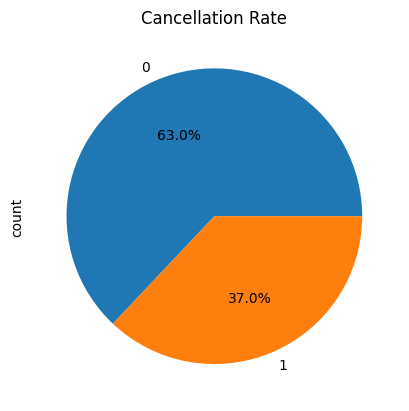

In [ ]:
# 2. Pie Chart for `is_canceled`
hotel_df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cancellation Rate')
plt.show()

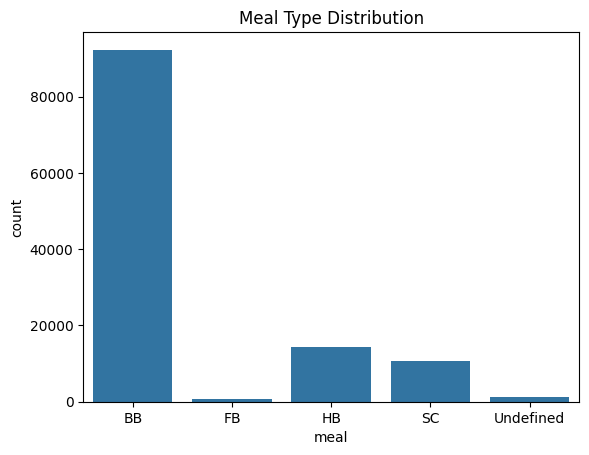

In [ ]:
# 3. Count Plot for `meal` Type
sns.countplot(data=hotel_df, x='meal')
plt.title('Meal Type Distribution')
plt.show()

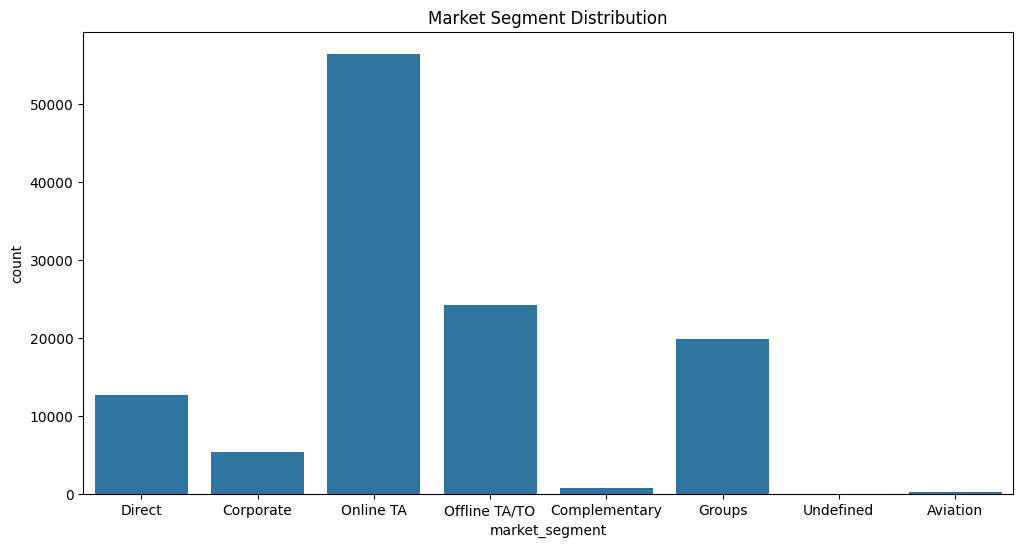

In [ ]:
# 4. Bar Plot for `market_segment`
plt.figure(figsize=(12, 6))
sns.countplot(data=hotel_df, x='market_segment')
plt.title('Market Segment Distribution')
plt.show()

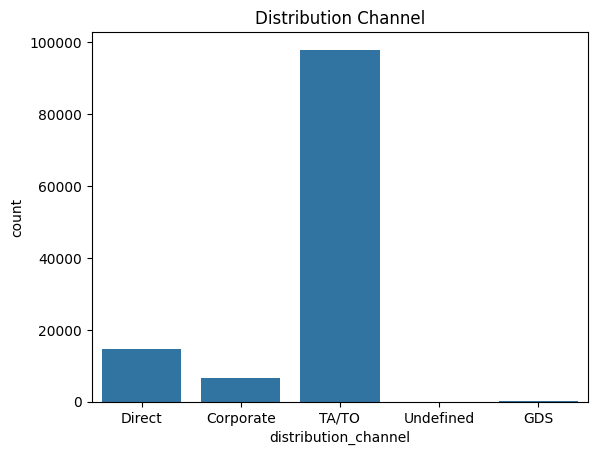

In [ ]:
# 5. Bar Plot for `distribution_channel`
sns.countplot(data=hotel_df, x='distribution_channel')
plt.title('Distribution Channel')
plt.show()

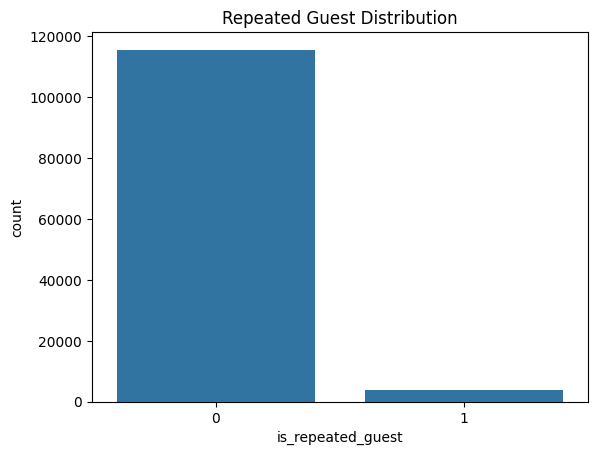

In [ ]:
# 6. Count Plot for `is_repeated_guest`
sns.countplot(data=hotel_df, x='is_repeated_guest')
plt.title('Repeated Guest Distribution')
plt.show()

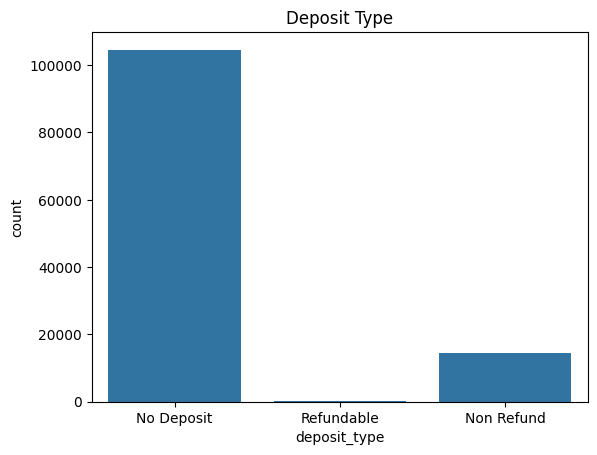

In [ ]:
# 7. Bar Plot for `deposit_type`
sns.countplot(data=hotel_df, x='deposit_type')
plt.title('Deposit Type')
plt.show()

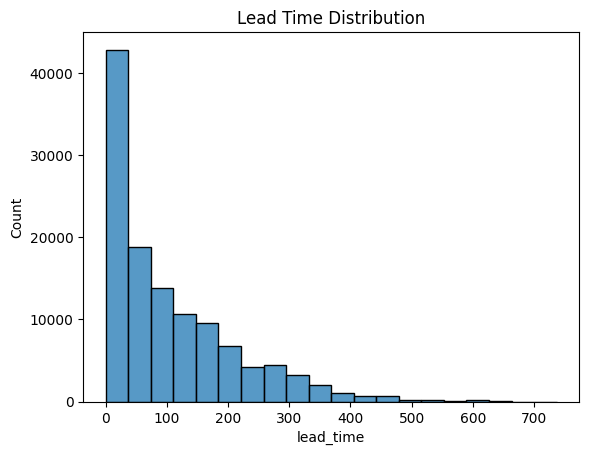

In [ ]:
# 8. Histogram for `lead_time`
sns.histplot(hotel_df['lead_time'], bins=20)
plt.title('Lead Time Distribution')
plt.show()

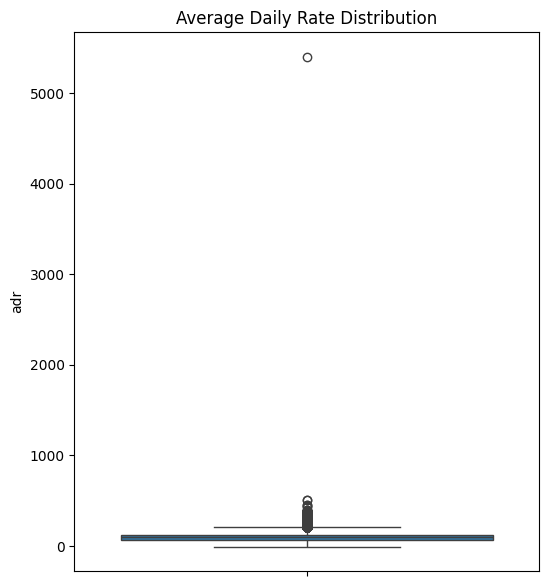

In [ ]:
# 9. Box Plot for `adr`
plt.figure(figsize=(6, 7))
sns.boxplot(hotel_df['adr'])
plt.title('Average Daily Rate Distribution')
plt.show()

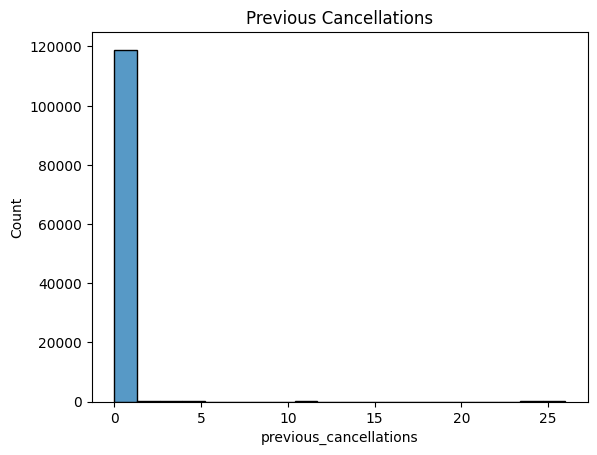

In [ ]:
# 11. Histogram for `previous_cancellations`
sns.histplot(hotel_df['previous_cancellations'], bins=20)
plt.title('Previous Cancellations')
plt.show()

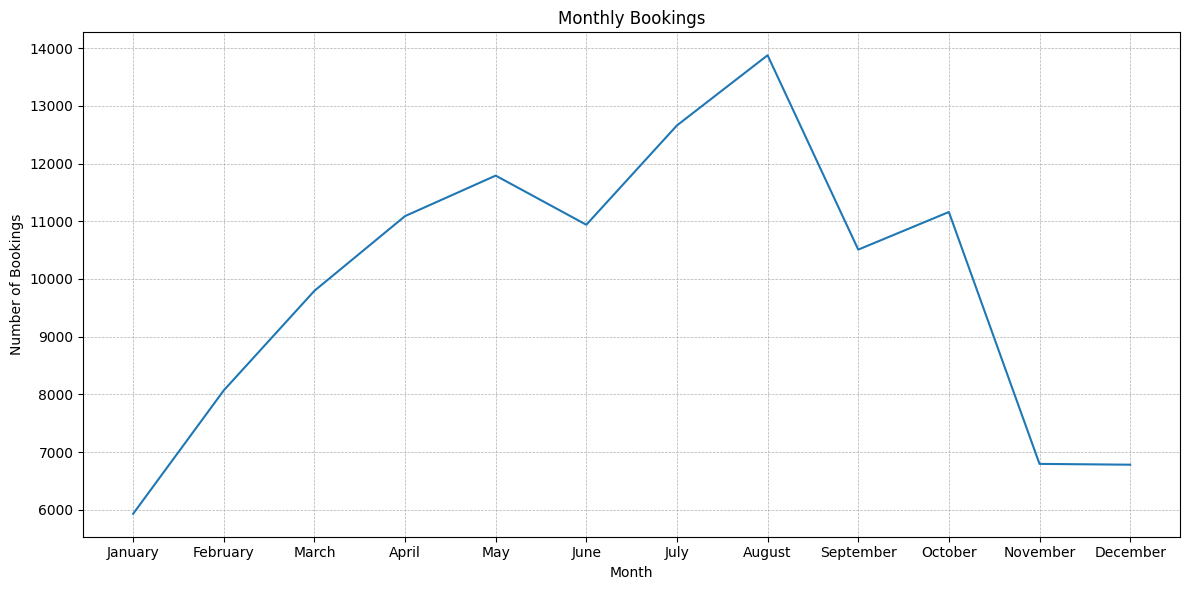

In [ ]:
# 12. Line Chart for Monthly Bookings
import calendar


# Create a full list of months
months_order = [calendar.month_name[i] for i in range(1, 13)]

# Count bookings by month
monthly_counts = hotel_df['arrival_date_month'].value_counts()

# Create a Series with all months, and fill missing months with zeros
all_months_series = pd.Series(index=months_order).fillna(0)
all_months_series.update(monthly_counts)

plt.figure(figsize=(12,6))
all_months_series.plot.line()
plt.title('Monthly Bookings')
plt.ylabel('Number of Bookings')
plt.xlabel('Month')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=range(0, 12), labels=months_order)
plt.tight_layout()
plt.show()


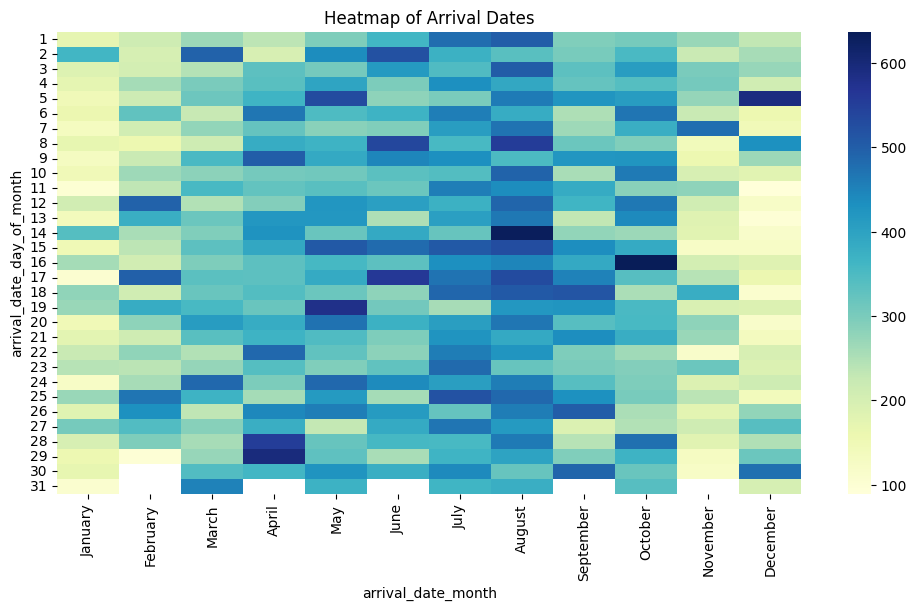

In [ ]:

# 13. Heatmap for `arrival_date_day_of_month` vs `arrival_date_month`
# Create a list of month names in order
months_order = [calendar.month_name[i] for i in range(1, 13)]

# Group data and create a heatmap data frame
heatmap_data = hotel_df.groupby(['arrival_date_day_of_month', 'arrival_date_month']).size().unstack()

# Reindex columns to ensure month order from January to December
heatmap_data = heatmap_data[months_order]

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Arrival Dates')
plt.show()

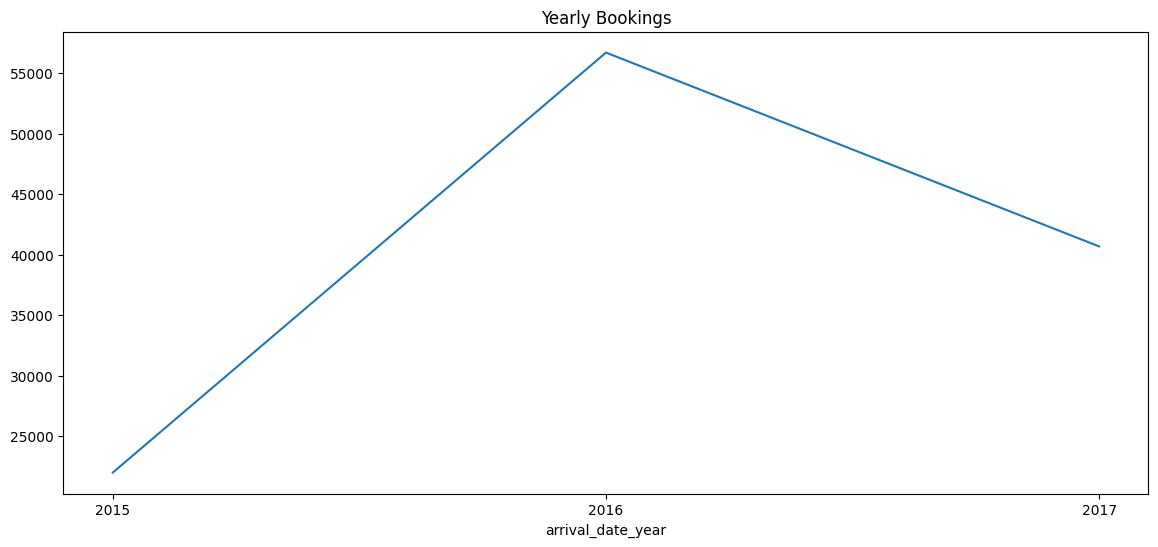

In [ ]:

plt.figure(figsize=(14,6))

# Plot the line chart
ax = hotel_df['arrival_date_year'].value_counts().sort_index().plot.line()

# Set the title
plt.title('Yearly Bookings')

# Set x-ticks to display the unique years
ax.set_xticks(hotel_df['arrival_date_year'].unique())

# Display the plot
plt.show()

In [ ]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

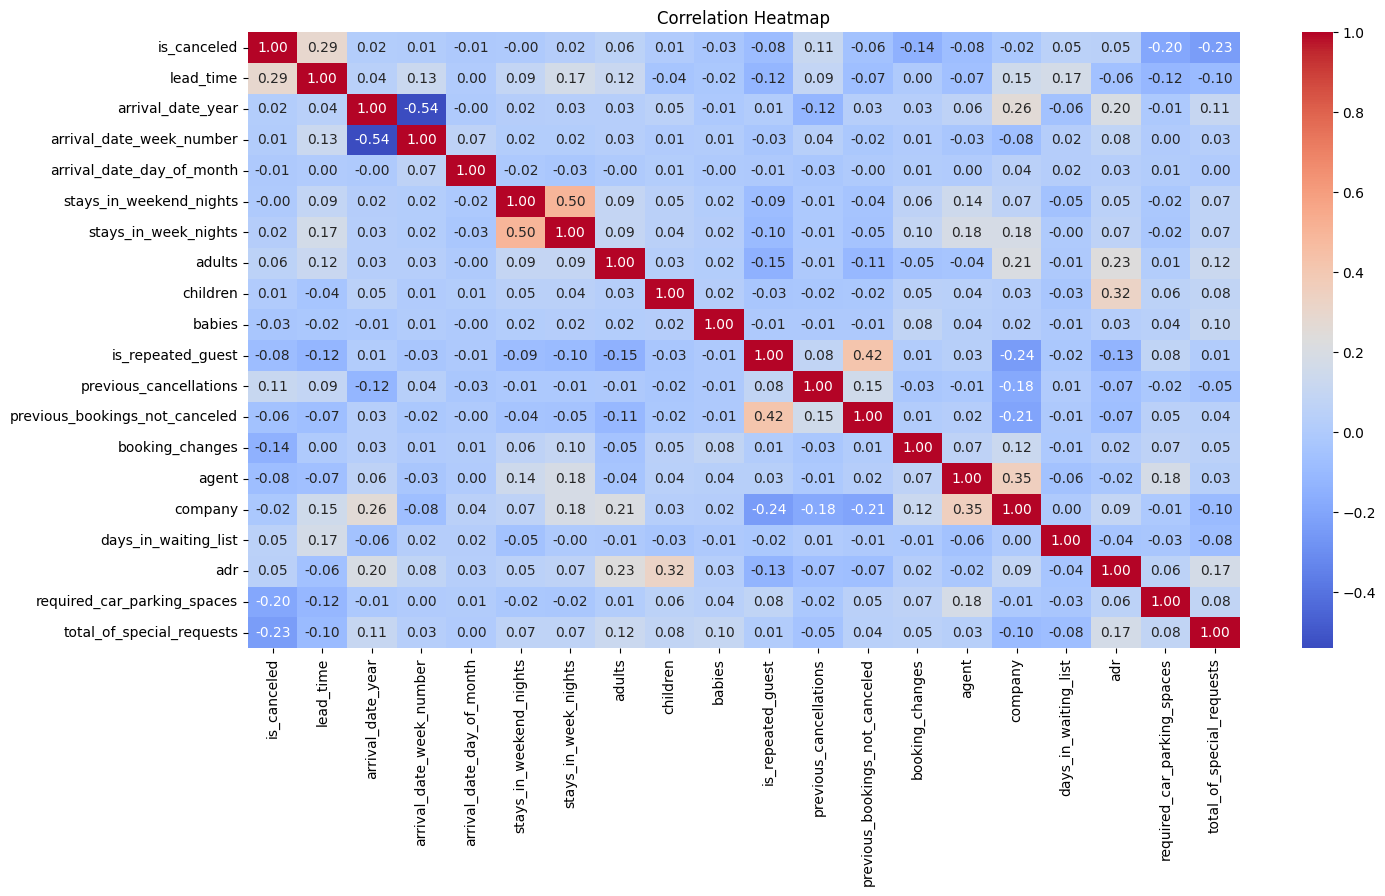

In [ ]:

plt.figure(figsize=(16,8))
# Select only numeric columns
numeric_cols = hotel_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


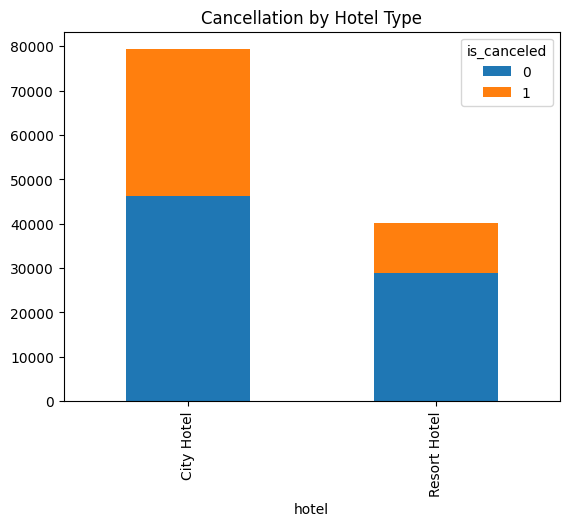

In [ ]:
#  Stacked Bar Plot for `hotel` vs `is_canceled`
pd.crosstab(hotel_df['hotel'], hotel_df['is_canceled']).plot.bar(stacked=True)
plt.title('Cancellation by Hotel Type')
plt.show()

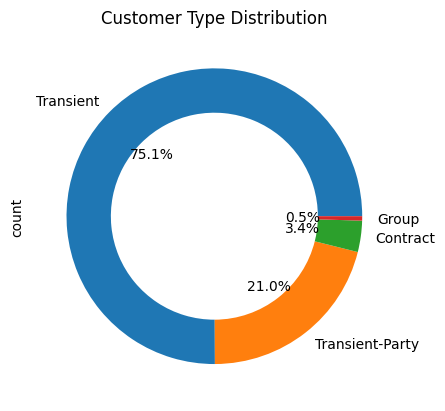

In [ ]:
# Donut Chart for `customer_type`
hotel_df['customer_type'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Customer Type Distribution')
plt.show()

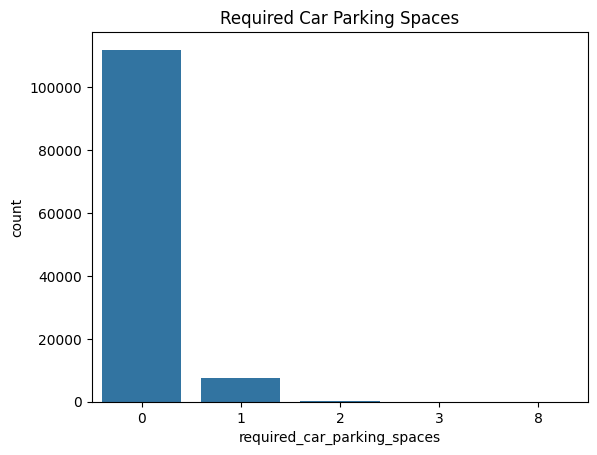

In [ ]:
# Bar Plot for `required_car_parking_spaces`
sns.countplot(data=hotel_df, x='required_car_parking_spaces')
plt.title('Required Car Parking Spaces')
plt.show()

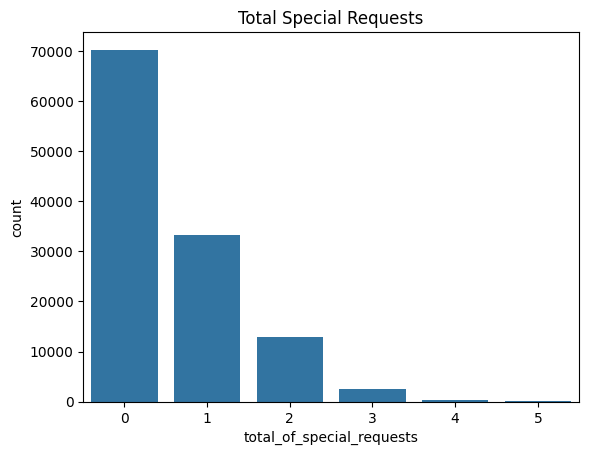

In [ ]:
#  Count Plot for `total_of_special_requests`
sns.countplot(data=hotel_df, x='total_of_special_requests')
plt.title('Total Special Requests')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

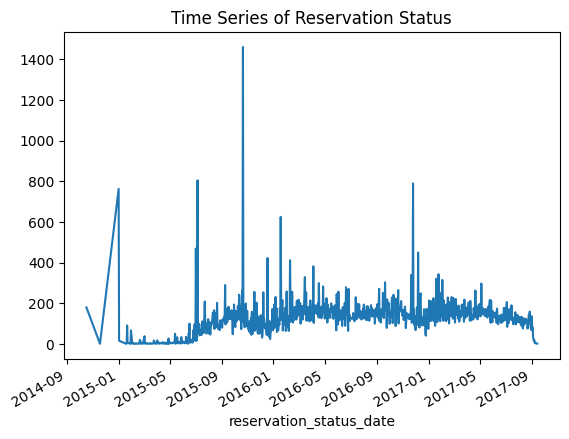

In [ ]:
#  Time Series Plot for `reservation_status_date`
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'])
hotel_df.groupby('reservation_status_date')['reservation_status'].count().plot.line()
plt.title('Time Series of Reservation Status')
plt.show

# Data Preprocessing

In [12]:
# Make a duplicate of the dataframe.
hotel_df_preprocessed = hotel_df.copy()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_df_preprocessed

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
# Dropping reservation_status because it is directly related to is_canceled column
hotel_df_preprocessed = hotel_df_preprocessed.drop('reservation_status', axis=1)


In [14]:
hotel_df_preprocessed.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
# Add the missing numbers.
imputer = SimpleImputer(strategy='most_frequent')

hotel_df_preprocessed['children'] = imputer.fit_transform(hotel_df_preprocessed[['children']])

imputed_country = imputer.fit_transform(hotel_df_preprocessed[['country']])

# We must choose the first column to conform to the intended format of the DataFrame as imputed_country is a 2D array.
hotel_df_preprocessed['country'] = imputed_country[:, 0]


In [16]:
# Add a specific value to the "agent" values that are lacking.
hotel_df_preprocessed['agent'].fillna(-1, inplace=True)

In [17]:
# Drop the 'company' column
hotel_df_preprocessed.drop(columns='company', inplace=True)

In [18]:
hotel_df_preprocessed.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [19]:
# First, ensure the date column is in datetime format
hotel_df_preprocessed['reservation_status_date'] = pd.to_datetime(hotel_df_preprocessed['reservation_status_date'])

# Extract year, month, and day as separate features
hotel_df_preprocessed['reservation_status_year'] = hotel_df_preprocessed['reservation_status_date'].dt.year
hotel_df_preprocessed['reservation_status_month'] = hotel_df_preprocessed['reservation_status_date'].dt.month
hotel_df_preprocessed['reservation_status_day'] = hotel_df_preprocessed['reservation_status_date'].dt.day

# drop the original 'reservation_status_date' column if it's no longer needed
hotel_df_preprocessed.drop(columns=['reservation_status_date'], inplace=True)


In [20]:
frequency_map = hotel_df_preprocessed['country'].value_counts().to_dict()
#in modelling phase country will drop for modelling purposes
hotel_df_preprocessed['country_encoded'] = hotel_df_preprocessed['country'].map(frequency_map)


In [21]:
# Put categorical variables in encoding
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type']

In [22]:
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categoricals = pd.DataFrame(one_hot_encoder.fit_transform(hotel_df_preprocessed[categorical_cols]))
encoded_categoricals.columns = one_hot_encoder.get_feature_names_out(categorical_cols)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
# Combine encoded columns and eliminate the originals.
hotel_df_preprocessed = pd.concat([hotel_df_preprocessed.drop(columns=categorical_cols), encoded_categoricals], axis=1)

In [24]:
# Set numerical features to normal.
scaler = StandardScaler()
# Standard scaling for non-cyclical features
standard_scaler_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                        'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                        'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                        'total_of_special_requests', 'reservation_status_year','country_encoded']
hotel_df_preprocessed[standard_scaler_cols] = scaler.fit_transform(hotel_df_preprocessed[standard_scaler_cols])

# Cycle of change for day and month
hotel_df_preprocessed['month_sin'] = np.sin((hotel_df_preprocessed['reservation_status_month'] - 1) * (2. * np.pi / 12))
hotel_df_preprocessed['month_cos'] = np.cos((hotel_df_preprocessed['reservation_status_month'] - 1) * (2. * np.pi / 12))
hotel_df_preprocessed['day_sin'] = np.sin((hotel_df_preprocessed['reservation_status_day'] - 1) * (2. * np.pi / 31))
hotel_df_preprocessed['day_cos'] = np.cos((hotel_df_preprocessed['reservation_status_day'] - 1) * (2. * np.pi / 31))



In [25]:
hotel_df_preprocessed.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,month_sin,month_cos,day_sin,day_cos
0,0,2.227051,2015,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.224647e-16,-1.0,0.000000,1.000000
1,0,5.923385,2015,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.224647e-16,-1.0,0.000000,1.000000
2,0,-0.907814,2015,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.224647e-16,-1.0,0.201299,0.979530
3,0,-0.851667,2015,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.224647e-16,-1.0,0.201299,0.979530
4,0,-0.842309,2015,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,...,0.0,0.0,0.0,0.0,1.0,0.0,1.224647e-16,-1.0,0.394356,0.918958


In [26]:
# Convert column names to a list and print
column_names = hotel_df_preprocessed.columns.tolist()
print(len(column_names))


80


# Data Modeling and Validation

In [27]:

X = hotel_df_preprocessed.drop(['country','is_canceled'], axis=1)
y = hotel_df_preprocessed['is_canceled']

## Features Importance Functions

In [ ]:
def get_feature_importance(model, feature_names):
    """
    Gets the feature importance for models with built-in feature importance attribute.

    Args:
    model: Trained model with feature_importances_ attribute.
    feature_names: List of feature names.

    Returns:
    Sorted feature importance in descending order.
    """
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_features = [feature_names[i] for i in sorted_indices]

    return sorted(zip(sorted_features, sorted_importances), key=lambda x: x[1], reverse=True)


In [ ]:
from sklearn.inspection import permutation_importance

def get_permutation_feature_importance(model, X, y, feature_names, n_repeats=30, random_state=42):

    result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=random_state)
    sorted_indices = result.importances_mean.argsort()[::-1]

    sorted_features = [feature_names[i] for i in sorted_indices]
    sorted_importances = result.importances_mean[sorted_indices]

    return sorted(zip(sorted_features, sorted_importances), key=lambda x: x[1], reverse=True)


## Cross Validation Function

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

def evaluate_model_with_cross_validation(model, X, y, cv=5):
   
    scoring_metrics = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': 'roc_auc'
    }

    scores = {}
    for metric_name, metric in scoring_metrics.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
        scores[metric_name] = np.mean(cv_scores)

    model_name = type(model).__name__
    print(f"{model_name} Evaluation Metrics:")
    for metric_name, score in scores.items():
        print(f"{metric_name.capitalize()}: {score:.4f}")

    scores['model'] = model_name
    return scores



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variables
model = RandomForestClassifier()
model.fit(X, y)

In [ ]:
feature_names = X.columns  # Assuming X is a DataFrame

# Get feature importances directly from the model
feature_importances = get_feature_importance(model, feature_names)

# Print feature importances
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")


deposit_type_Non Refund: 0.09641775848281248
country_encoded: 0.08040373198037919
arrival_date_week_number: 0.07863241420837581
lead_time: 0.07492670091855459
arrival_date_day_of_month: 0.04469068483729612
reservation_status_month: 0.04248436826165885
total_of_special_requests: 0.039215530362672245
month_cos: 0.0363832985039351
adr: 0.036144138185952294
reservation_status_day: 0.033614656412180255
month_sin: 0.030117055460763674
agent: 0.028677460692751768
day_sin: 0.027863922094718503
day_cos: 0.027399344437234494
previous_cancellations: 0.025576773636996633
stays_in_week_nights: 0.01759956101671135
required_car_parking_spaces: 0.017594748339843983
customer_type_Transient: 0.016403209562628484
market_segment_Online TA: 0.016279684848187977
arrival_date_year: 0.015715512814314877
reservation_status_year: 0.015378823201137782
market_segment_Groups: 0.014913576880276233
booking_changes: 0.013003755790279419
market_segment_Offline TA/TO: 0.011520896360038889
stays_in_weekend_nights: 0.011

In [ ]:
for feature, importance in feature_importances:
    print(f",'{feature}'")

,'deposit_type_Non Refund'
,'country_encoded'
,'arrival_date_week_number'
,'lead_time'
,'arrival_date_day_of_month'
,'reservation_status_month'
,'total_of_special_requests'
,'month_cos'
,'adr'
,'reservation_status_day'
,'month_sin'
,'agent'
,'day_sin'
,'day_cos'
,'previous_cancellations'
,'stays_in_week_nights'
,'required_car_parking_spaces'
,'customer_type_Transient'
,'market_segment_Online TA'
,'arrival_date_year'
,'reservation_status_year'
,'market_segment_Groups'
,'booking_changes'
,'market_segment_Offline TA/TO'
,'stays_in_weekend_nights'
,'customer_type_Transient-Party'
,'distribution_channel_TA/TO'
,'arrival_date_month_August'
,'arrival_date_month_July'
,'hotel_Resort Hotel'
,'arrival_date_month_December'
,'adults'
,'arrival_date_month_March'
,'arrival_date_month_May'
,'arrival_date_month_January'
,'assigned_room_type_D'
,'arrival_date_month_June'
,'market_segment_Direct'
,'arrival_date_month_February'
,'arrival_date_month_October'
,'distribution_channel_Direct'
,'arrival_date_m

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
Selected_X = X[['deposit_type_Non Refund'
,'country_encoded'
,'arrival_date_week_number'
,'lead_time'
,'arrival_date_day_of_month'
,'reservation_status_month'
,'total_of_special_requests'
,'month_cos'
,'adr'
,'reservation_status_day'
,'month_sin'
,'agent'
,'day_sin'
,'day_cos'
,'previous_cancellations'
,'stays_in_week_nights'
,'required_car_parking_spaces'
,'customer_type_Transient'
,'market_segment_Online TA'
,'arrival_date_year'
,'reservation_status_year'
,'market_segment_Groups'
,'booking_changes'
,'market_segment_Offline TA/TO'
,'stays_in_weekend_nights'
,'customer_type_Transient-Party']]
evaluate_model_with_cross_validation(model, Selected_X, y)


RandomForestClassifier Evaluation Metrics:
Accuracy: 0.7047
Precision: 0.6384
Recall: 0.6655
F1: 0.6300
Roc_auc: 0.8045


{'accuracy': 0.7047491414691347,
 'precision': 0.6384080116185155,
 'recall': 0.6654949927887669,
 'f1': 0.6299639449000802,
 'roc_auc': 0.8045337744348396,
 'model': 'RandomForestClassifier'}

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials


In [ ]:
space = {
    'n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    'max_depth': hp.choice('max_depth', [10, 20, 30, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Replaced 'auto' with 'sqrt'
}


In [ ]:
def objective(params):
    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, Selected_X, y, scoring='accuracy', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}


In [ ]:
trials = Trials()
best_params = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=4, 
    trials=trials
)


100%|██████████| 4/4 [19:19<00:00, 289.77s/trial, best loss: -0.7102521149174972]


In [ ]:
best_params

{'max_depth': 2,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 0}

In [ ]:

best_params = {
    'n_estimators': [100, 200, 300][best_params['n_estimators']],
    'max_depth': [10, 20, 30, None][best_params['max_depth']],
    'min_samples_split': [2, 5, 10][best_params['min_samples_split']],
    'min_samples_leaf': [1, 2, 4][best_params['min_samples_leaf']],
    'max_features': ['sqrt', 'log2', None][best_params['max_features']]
}

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(**best_params)

# Evaluate the model
evaluate_model_with_cross_validation(model, Selected_X, y)

RandomForestClassifier Evaluation Metrics:
Accuracy: 0.7069
Precision: 0.6445
Recall: 0.6557
F1: 0.6235
Roc_auc: 0.8076


{'accuracy': 0.7068933746544938,
 'precision': 0.6445005996418418,
 'recall': 0.6556583621795438,
 'f1': 0.6234602298502835,
 'roc_auc': 0.8076261683685442,
 'model': 'RandomForestClassifier'}

In [ ]:
print("Best Parameters:", best_params)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()
model.fit(X, y)
feature_names = X.columns 

# Get the coefficients from the model
coefficients = model.coef_[0]

# Pair each feature with its coefficient
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print feature importances
for feature, coef in feature_importance:
    print(f"{feature}: {coef}")


country_encoded: 0.9758682505983408
required_car_parking_spaces: -0.9273319441703324
deposit_type_Non Refund: 0.8682954979192398
lead_time: 0.7467179339831268
month_cos: 0.7453386881238855
customer_type_Transient: 0.7085487986614589
total_of_special_requests: -0.6207575358902203
customer_type_Transient-Party: -0.6035818522780331
market_segment_Online TA: 0.5924666226995773
adr: 0.5782112023998918
previous_cancellations: 0.5467227499488622
booking_changes: -0.45564073629395546
market_segment_Offline TA/TO: -0.4514234826758573
distribution_channel_TA/TO: 0.3797711623614479
hotel_Resort Hotel: -0.36974010627574055
distribution_channel_Direct: -0.30295768323194155
assigned_room_type_D: -0.27890412532689735
market_segment_Direct: -0.277967407996037
reservation_status_year: -0.2752780413600871
market_segment_Groups: 0.2382152136933432
is_repeated_guest: -0.23242928058824952
previous_bookings_not_canceled: -0.2151797033245271
days_in_waiting_list: -0.18553490866265532
meal_HB: -0.184717981178

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print feature importances
for feature, coef in feature_importance:
    print(f",'{feature}'")

,'country_encoded'
,'required_car_parking_spaces'
,'deposit_type_Non Refund'
,'lead_time'
,'month_cos'
,'customer_type_Transient'
,'total_of_special_requests'
,'customer_type_Transient-Party'
,'market_segment_Online TA'
,'adr'
,'previous_cancellations'
,'booking_changes'
,'market_segment_Offline TA/TO'
,'distribution_channel_TA/TO'
,'hotel_Resort Hotel'
,'distribution_channel_Direct'
,'assigned_room_type_D'
,'market_segment_Direct'
,'reservation_status_year'
,'market_segment_Groups'
,'is_repeated_guest'
,'previous_bookings_not_canceled'
,'days_in_waiting_list'
,'meal_HB'
,'meal_SC'
,'adults'
,'arrival_date_week_number'
,'assigned_room_type_E'
,'market_segment_Corporate'
,'reservation_status_month'
,'assigned_room_type_F'
,'arrival_date_month_March'
,'arrival_date_month_June'
,'assigned_room_type_C'
,'day_sin'
,'arrival_date_month_September'
,'arrival_date_month_May'
,'arrival_date_month_February'
,'meal_Undefined'
,'stays_in_week_nights'
,'assigned_room_type_B'
,'stays_in_weekend_night

In [ ]:
Selected_X = X[['country_encoded'
,'required_car_parking_spaces'
,'deposit_type_Non Refund'
,'lead_time'
,'month_cos'
,'customer_type_Transient'
,'total_of_special_requests'
,'customer_type_Transient-Party'
,'market_segment_Online TA'
,'adr'
,'previous_cancellations'
,'booking_changes'
,'market_segment_Offline TA/TO'
,'distribution_channel_TA/TO'
,'hotel_Resort Hotel'
,'distribution_channel_Direct'
,'assigned_room_type_D'
,'market_segment_Direct'
,'reservation_status_year'
,'market_segment_Groups'
,'is_repeated_guest'
,'previous_bookings_not_canceled'
,'days_in_waiting_list'
,'meal_HB'
,'meal_SC'
,'adults'
,'arrival_date_week_number']]
model = LogisticRegression()
evaluate_model_with_cross_validation(model, Selected_X, y)

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegression Evaluation Metrics:
Accuracy: 0.7139
Precision: 0.6736
Recall: 0.5658
F1: 0.5777
Roc_auc: 0.8047


C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.7139207638830722,
 'precision': 0.6736187463401457,
 'recall': 0.565839886849733,
 'f1': 0.5777198236590262,
 'roc_auc': 0.8047420704471933,
 'model': 'LogisticRegression'}

In [ ]:
space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(100)),
    'solver': hp.choice('solver', [
        {
            'name': 'liblinear',
            'penalty': hp.choice('liblinear_penalty', ['l1', 'l2'])
        },
        {
            'name': 'newton-cg',
            'penalty': 'l2'
        },
        {
            'name': 'lbfgs',
            'penalty': 'l2'
        },
        {
            'name': 'sag',
            'penalty': 'l2'
        },
        {
            'name': 'saga',
            'penalty': hp.choice('saga_penalty', ['l1', 'l2', 'elasticnet', 'none'])
        }
    ])
}


In [ ]:
def objective(params):
    solver = params['solver']['name']
    penalty = params['solver'].get('penalty', 'l2')  # Default to 'l2' if not specified
    clf = LogisticRegression(C=params['C'], solver=solver, penalty=penalty, max_iter=1000)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}



In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
best_params = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials
)


 20%|██        | 1/5 [00:08<00:33,  8.44s/trial, best loss: -0.7147248513275819]

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

 40%|████      | 2/5 [01:56<03:21, 67.21s/trial, best loss: -0.7147248513275819]

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n

 60%|██████    | 3/5 [12:28<10:50, 325.04s/trial, best loss: -0.7958120445598459]

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docum

 80%|████████  | 4/5 [14:13<03:58, 238.00s/trial, best loss: -0.7958120445598459]

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

100%|██████████| 5/5 [15:59<00:00, 191.96s/trial, best loss: -0.7958120445598459]


C:\Users\Busra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



In [ ]:
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.02127117150680476, 'solver': 1}


In [ ]:
# Extracting the best solver and its associated penalty
solver_choice = best_params['solver']
if solver_choice == 1:  # newton-cg
    best_solver = 'newton-cg'
    best_penalty = 'l2'
elif solver_choice == 2:  # lbfgs
    best_solver = 'lbfgs'
    best_penalty = 'l2'
elif solver_choice == 3:  # sag
    best_solver = 'sag'
    best_penalty = 'l2'
elif solver_choice == 4:  # saga
    best_solver = 'saga'
    saga_penalty_choice = best_params['saga_penalty']
    best_penalty = ['l1', 'l2', 'elasticnet', 'none'][saga_penalty_choice]
else:  # liblinear
    best_solver = 'liblinear'
    liblinear_penalty_choice = best_params['liblinear_penalty']
    best_penalty = ['l1', 'l2'][liblinear_penalty_choice]

# Extracting the value of C
best_C = best_params['C']


In [ ]:
# Extracting the best solver and its associated penalty
solver_choice = best_params['solver']
if solver_choice == 1:  # newton-cg
    best_solver = 'newton-cg'
    best_penalty = 'l2'
elif solver_choice == 2:  # lbfgs
    best_solver = 'lbfgs'
    best_penalty = 'l2'
elif solver_choice == 3:  # sag
    best_solver = 'sag'
    best_penalty = 'l2'
elif solver_choice == 4:  # saga
    best_solver = 'saga'
    saga_penalty_choice = best_params['saga_penalty']
    best_penalty = ['l1', 'l2', 'elasticnet', 'none'][saga_penalty_choice]
else:  # liblinear
    best_solver = 'liblinear'
    liblinear_penalty_choice = best_params['liblinear_penalty']
    best_penalty = ['l1', 'l2'][liblinear_penalty_choice]

# Extracting the value of C
best_C = best_params['C']


In [ ]:
# Initialize the model with the best parameters
model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty, max_iter=1000)

evaluate_model_with_cross_validation(model, Selected_X, y)


LogisticRegression Evaluation Metrics:
Accuracy: 0.7176
Precision: 0.6795
Recall: 0.5669
F1: 0.5826
Roc_auc: 0.8032


{'accuracy': 0.7175894128486473,
 'precision': 0.6794707893832189,
 'recall': 0.5669480926729731,
 'f1': 0.5826389264632097,
 'roc_auc': 0.8031740397068317,
 'model': 'LogisticRegression'}

## Deep Learning Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def model_builder(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                           activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize and run the hyperband tuner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Start the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Trial 30 Complete [00h 01m 24s]
val_accuracy: 0.8161487579345703

Best val_accuracy So Far: 0.8420721888542175
Total elapsed time: 00h 20m 15s


In [46]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = keras.Sequential([
    layers.Dense(units=best_hps.get('units'), activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
2985/2985 [==============================] - 11s 4ms/step - loss: 1.4711 - accuracy: 0.7625 - val_loss: 0.3863 - val_accuracy: 0.8241
Epoch 2/50
2985/2985 [==============================] - 7s 2ms/step - loss: 0.4288 - accuracy: 0.8010 - val_loss: 0.4138 - val_accuracy: 0.8089
Epoch 3/50
2985/2985 [==============================] - 9s 3ms/step - loss: 0.4169 - accuracy: 0.8078 - val_loss: 0.3649 - val_accuracy: 0.8289
Epoch 4/50
2985/2985 [==============================] - 7s 2ms/step - loss: 0.4002 - accuracy: 0.8149 - val_loss: 0.3567 - val_accuracy: 0.8365
Epoch 5/50
2985/2985 [==============================] - 9s 3ms/step - loss: 0.4054 - accuracy: 0.8197 - val_loss: 0.4594 - val_accuracy: 0.7983
Epoch 6/50
2985/2985 [==============================] - 7s 2ms/step - loss: 0.4095 - accuracy: 0.8193 - val_loss: 0.3837 - val_accuracy: 0.8347
Epoch 7/50
2985/2985 [==============================] - 9s 3ms/step - loss: 0.4101 - accuracy: 0.8195 - val_loss: 0.3834 - val_accuracy

In [49]:
from sklearn.metrics import classification_report, roc_auc_score
# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate metrics
print(classification_report(y_val, y_pred_classes))

# ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

747/747 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     14907
           1       0.91      0.67      0.77      8971

    accuracy                           0.85     23878
   macro avg       0.87      0.81      0.83     23878
weighted avg       0.86      0.85      0.84     23878

ROC-AUC Score: 0.8654144081818403


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np


# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to class labels

# Calculate Precision, Recall, F1-Score, and ROC AUC
accuracy = accuracy_score(y_val, y_pred_classes)
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


747/747 [==============================] - 2s 2ms/step
Accuracy: 0.8496942792528688
Precision: 0.9097137637028014
Recall: 0.6660350016720544
F1-Score: 0.7690327562906236
ROC AUC Score: 0.8654144081818403


In [52]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model builder function for hyperparameter tuning
def model_builder(hp):
    model = Sequential()

    # Tuning the number of units in the first dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))

    # Tuning the dropout rate
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    # Tuning the number of units in the second dense layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation='relu'))

    # Adding a second dropout layer
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    # Final layer
    model.add(Dense(1, activation='sigmoid'))

    # Tuning the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize and run the hyperband tuner with a new project name
new_project_name = 'new_hyperparameter_tuning'
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name=new_project_name)

# Start the new search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Trial 30 Complete [00h 01m 39s]
val_accuracy: 0.8416953086853027

Best val_accuracy So Far: 0.8927883505821228
Total elapsed time: 00h 25m 48s


In [53]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = Sequential()

best_model.add(Dense(units=best_hps.get('units'),
                     activation='relu',
                     input_shape=(X_train.shape[1],)))

# Adding the best dropout rate for the first dropout layer
best_model.add(Dropout(rate=best_hps.get('dropout_1')))

# Adding the second dense layer with the best units
best_model.add(Dense(units=best_hps.get('units_2'), activation='relu'))

# Adding the best dropout rate for the second dropout layer
best_model.add(Dropout(rate=best_hps.get('dropout_2')))

# Final layer
best_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the best model
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Optionally, evaluate the model on validation data
val_loss, val_accuracy = best_model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}')


Epoch 1/50
2985/2985 [==============================] - 15s 5ms/step - loss: 1.3209 - accuracy: 0.7040 - val_loss: 0.3931 - val_accuracy: 0.8196
Epoch 2/50
2985/2985 [==============================] - 16s 5ms/step - loss: 0.4228 - accuracy: 0.8038 - val_loss: 0.4361 - val_accuracy: 0.7894
Epoch 3/50
2985/2985 [==============================] - 22s 7ms/step - loss: 0.4134 - accuracy: 0.8073 - val_loss: 0.3694 - val_accuracy: 0.8293
Epoch 4/50
2985/2985 [==============================] - 13s 5ms/step - loss: 0.4005 - accuracy: 0.8142 - val_loss: 0.3698 - val_accuracy: 0.8289
Epoch 5/50
2985/2985 [==============================] - 14s 5ms/step - loss: 0.3955 - accuracy: 0.8186 - val_loss: 0.3709 - val_accuracy: 0.8355
Epoch 6/50
2985/2985 [==============================] - 12s 4ms/step - loss: 0.3790 - accuracy: 0.8255 - val_loss: 0.3253 - val_accuracy: 0.8562
Epoch 7/50
2985/2985 [==============================] - 12s 4ms/step - loss: 0.3763 - accuracy: 0.8296 - val_loss: 0.3375 - val_ac

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np


# Make predictions on the validation set
y_pred = best_model.predict(X_val)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to class labels

# Calculate Precision, Recall, F1-Score, and ROC AUC
accuracy = accuracy_score(y_val, y_pred_classes)
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


747/747 [==============================] - 2s 2ms/step
Accuracy: 0.8152274059804003
Precision: 0.7334357398873528
Recall: 0.7983502396611303
F1-Score: 0.7645175064047822
ROC AUC Score: 0.9099627066177634


In [56]:
from sklearn.metrics import classification_report, roc_auc_score
# Predict on the validation set
y_pred = best_model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Calculate metrics
print(classification_report(y_val, y_pred_classes))

# ROC-AUC score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC-AUC Score:", roc_auc)

747/747 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     14907
           1       0.73      0.80      0.76      8971

    accuracy                           0.82     23878
   macro avg       0.80      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878

ROC-AUC Score: 0.9099627066177634


## Evaluation and Comparison of Models

C:\Users\Busra\AppData\Local\Temp\ipykernel_12508\3739090064.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=df, palette=sns.color_palette([colors[i]]))
C:\Users\Busra\AppData\Local\Temp\ipykernel_12508\3739090064.py:54: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='model', y=metric, data=df, palette=sns.color_palette([colors[i]]))
C:\Users\Busra\AppData\Local\Temp\ipykernel_12508\3739090064.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y=metric, data=df, palette=sns.color_palette([colors[i]]))
C:\Users\Busra\AppData\Local\Temp\ipykernel_12508\3

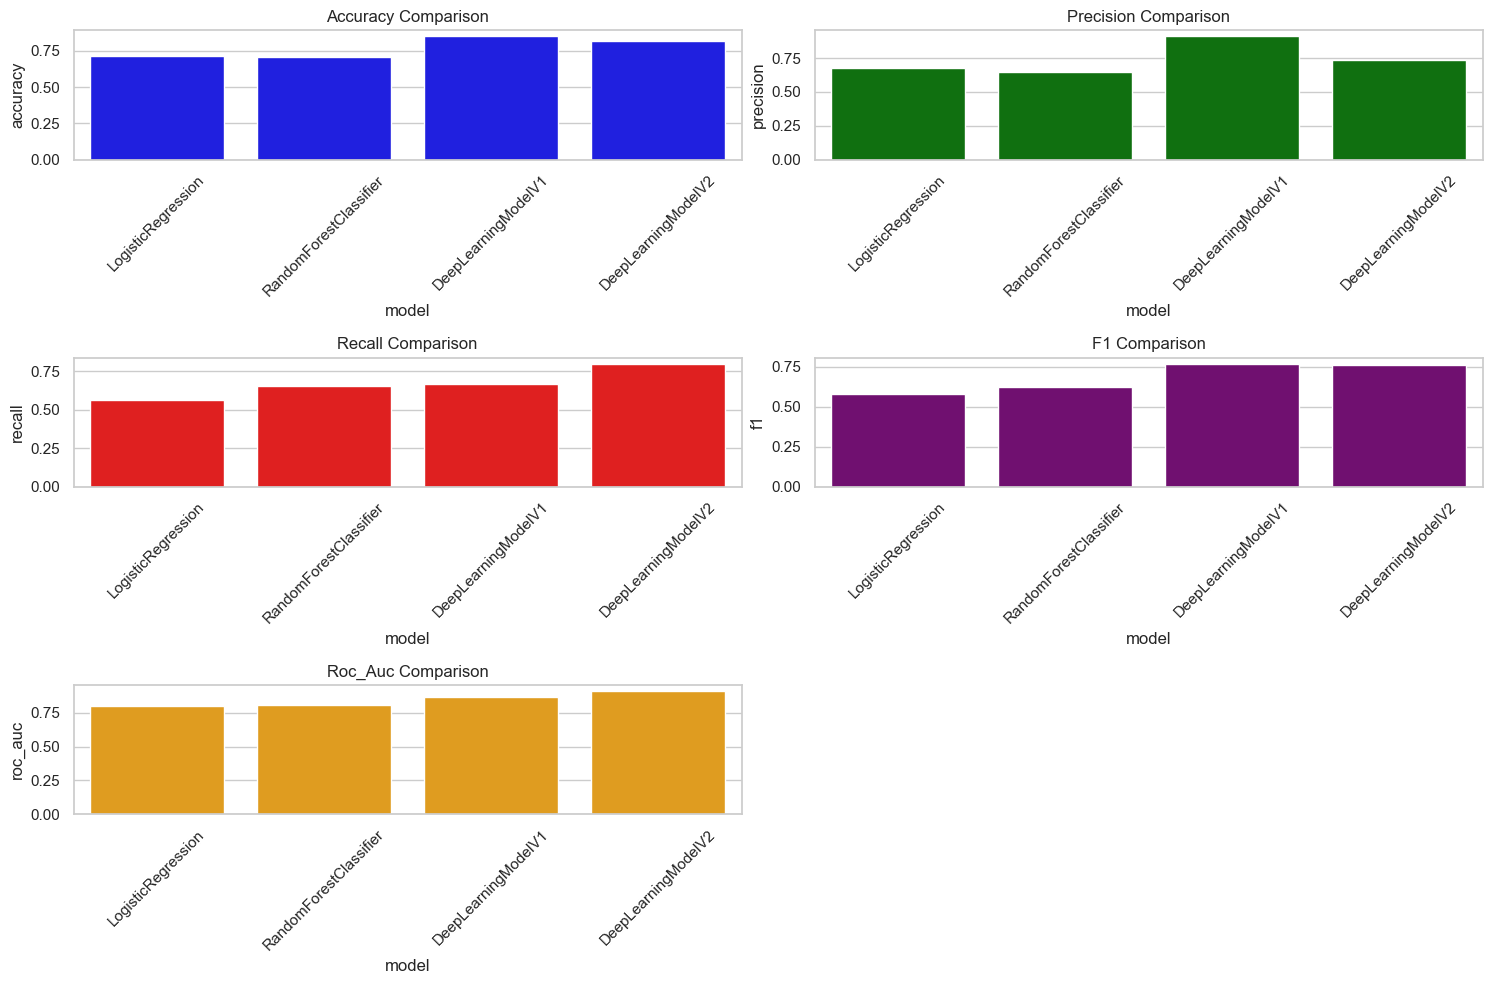

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for each model
logistic_regression_data = {
    'accuracy': 0.7175894128486473,
    'precision': 0.6794707893832189,
    'recall': 0.5669480926729731,
    'f1': 0.5826389264632097,
    'roc_auc': 0.8031740397068317,
    'model': 'LogisticRegression'
}

random_forest_data = {
    'accuracy': 0.7068933746544938,
    'precision': 0.6445005996418418,
    'recall': 0.6556583621795438,
    'f1': 0.6234602298502835,
    'roc_auc': 0.8076261683685442,
    'model': 'RandomForestClassifier'
}

deep_learning_v1_data = {
    'accuracy': 0.8496942792528688,
    'precision': 0.9097137637028014,
    'recall': 0.6660350016720544,
    'f1': 0.7690327562906236,
    'roc_auc': 0.8654144081818403,
    'model': 'DeepLearningModelV1'
}

deep_learning_v2_data = {
    'accuracy': 0.8152274059804003,
    'precision': 0.7334357398873528,
    'recall': 0.7983502396611303,
    'f1': 0.7645175064047822,
    'roc_auc': 0.9099627066177634,
    'model': 'DeepLearningModelV2'
}

# Combining the data into a DataFrame
data = [logistic_regression_data, random_forest_data, deep_learning_v1_data, deep_learning_v2_data]
df = pd.DataFrame(data)

# Plotting the data with different colors for each metric
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x='model', y=metric, data=df, palette=sns.color_palette([colors[i]]))
    plt.title(f'{metric.title()} Comparison')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


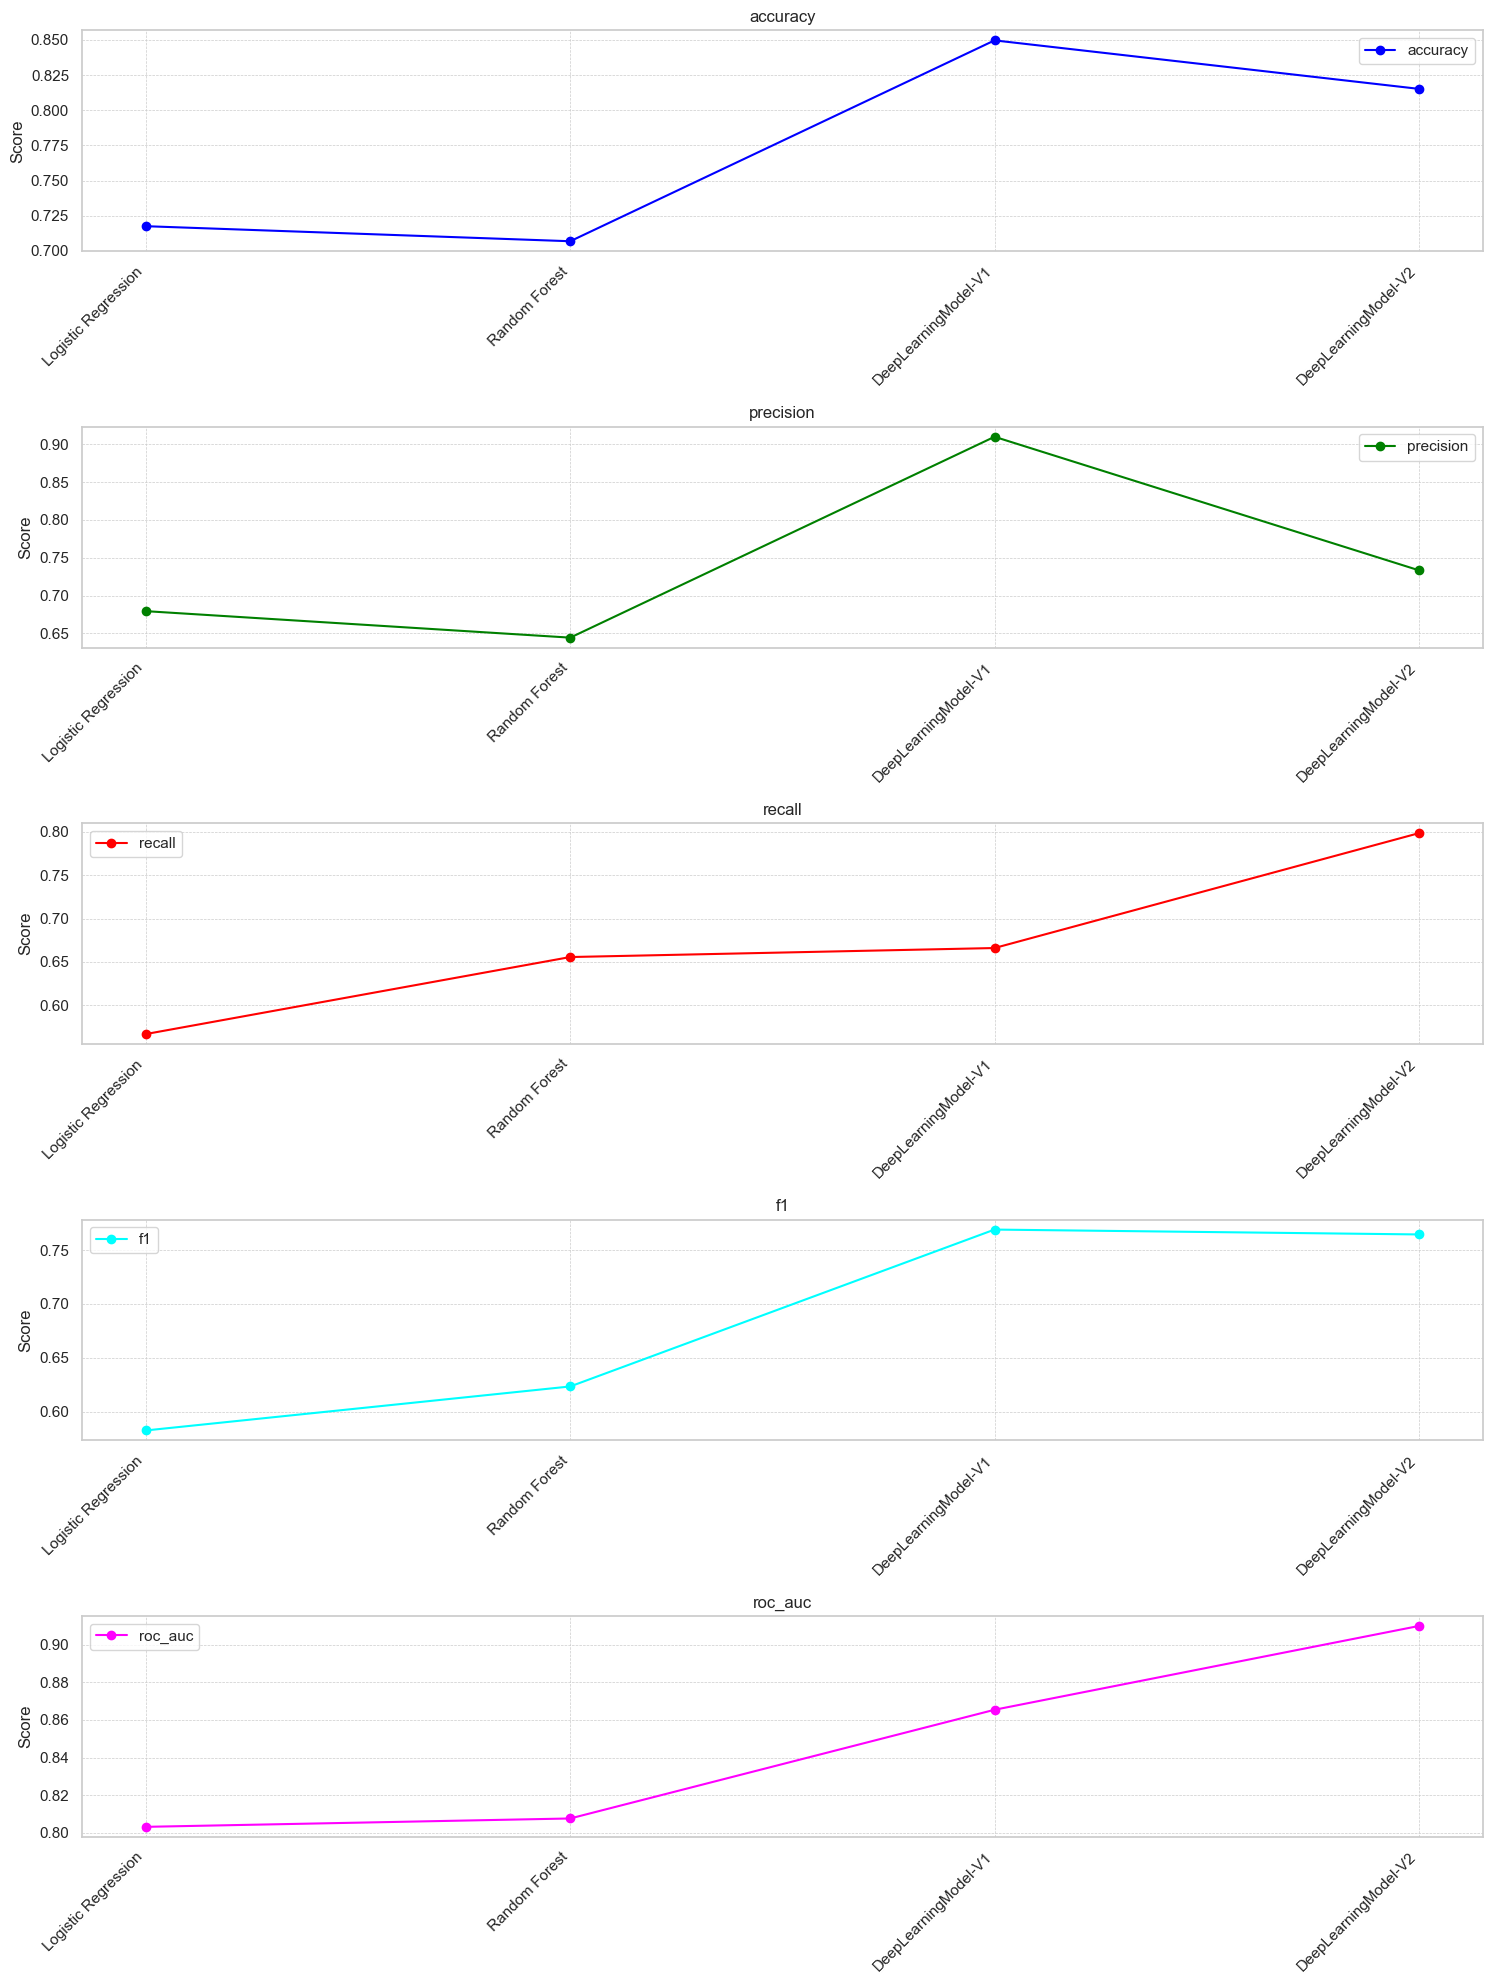

In [30]:
algorithms = ["Logistic Regression", "Random Forest", "DeepLearningModel-V1", "DeepLearningModel-V2"]
 
# Define colors for each metric
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
 
# Visualization
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))  # 5 rows for 5 metrics
 
# Plotting separate line plots for each metric with specified colors
for ax, metric, color in zip(axes, df.columns, colors):
    ax.plot(algorithms, df[metric], label=metric, marker='o', color=color)
    ax.set_title(metric)
    ax.set_xticks(algorithms)  # This ensures all algorithms are shown on x-axis
    ax.set_xticklabels(algorithms, rotation=45, ha='right')
    ax.set_ylabel('Score')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()  # To show the legend which mentions each metric
 
plt.tight_layout()
plt.show()

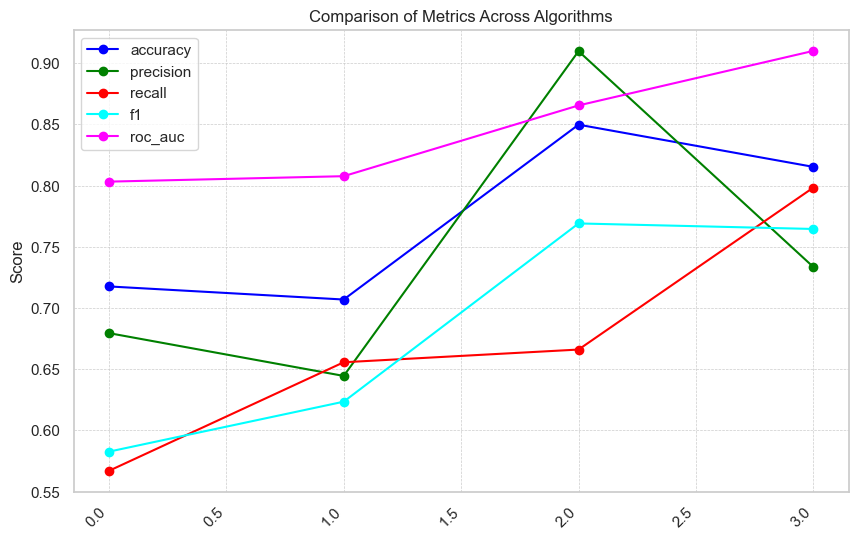

In [28]:
# Create a single plot combining all the line plots
plt.figure(figsize=(10, 6))

# Plot each metric in the same plot
for metric, color in zip(df.columns, colors):
    plt.plot(df.index, df[metric], label=metric, marker='o', color=color)

plt.title('Comparison of Metrics Across Algorithms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

This comparative analysis assessed the accuracy, precision, recall, f1-score, and ROC AUC score of five major metrics to compare the performance of four different models: Random Forest Classifier, Deep Learning Model v1, Deep Learning Model v2, Logistic Regression, and Deep Learning Model v2. When evaluating the performance of Deep Learning and Machine Learning models in classification tasks, these metrics are essential.

1. **Accuracy**: This metric, which is computed as the ratio of correctly predicted instances to total instances, indicates the overall correctness of the model. With an accuracy of 84.97%, the Deep Learning Model v1 demonstrated the highest performance, demonstrating its superior ability to classify instances correctly. The Logistic Regression model, on the other hand, demonstrated a lower accuracy of
71.76% despite being competitive.

2. **Precision**: The ratio of correctly predicted positive observations to all predicted positive observations is known as precision. With a precision of 90.97%, the Deep Learning Model v1 surpassed the other models once more. This implies that there is a high probability that the model will be accurate when it predicts a positive class.

3. **Recall (Sensitivity)**: The model's recall measures how well it can recognize each pertinent instance. Deep Learning Model v2 received the highest score (79.84%) in this category, demonstrating its ability to correctly identify the majority of true positive cases.

4. **F1-Score**: The F1-score offers a balance between recall and precision as the harmonic mean of these two metrics. With the highest F1-score of 76.90%, Deep Learning Model v1 demonstrated a well-balanced performance between recall and precision.

5. **ROC AUC Score**: The model's capacity for class discrimination is indicated by the ROC AUC score. An improved model performance is indicated by a higher AUC. The Deep Learning Model v2 demonstrated its superior discriminative power by receiving the highest score of 90.99% in this metric.

Overall, the deep learning models outperformed the classic machine learning models (Random Forest Classifier and Logistic Regression) on the majority of metrics. This was especially true for the Deep Learning Models v1 and  Deep Learning Models v2. These findings highlight the usefulness of deep learning approaches in predictive analytics by demonstrating their ability to handle challenging classification tasks.
